In [32]:
%matplotlib inline
import networkx as nx
from tribe.stats import FreqDist

import matplotlib.pyplot as plt
from operator import itemgetter

In [16]:
G = nx.read_graphml('/Users/benjamin/Dropbox/Public/20150814T212153Z.graphml')

def parse_domain(email):
    try:
        return email.split('@')[1]
    except IndexError:
        return "Unknown"

In [20]:
H = nx.Graph()

for idx, edge in enumerate(G.edges_iter()):
    domains = tuple(sorted([parse_domain(e) for e in edge]))
#     if idx > 10:
#         break
    
    if edge in H.edges():
        H.edge[domains[0]][domains[1]]['weight'] += 1
    
    else:
        H.add_edge(*domains, weight=1)

print nx.info(H)

Name: 
Type: Graph
Number of nodes: 1502
Number of edges: 6181
Average degree:   8.2304


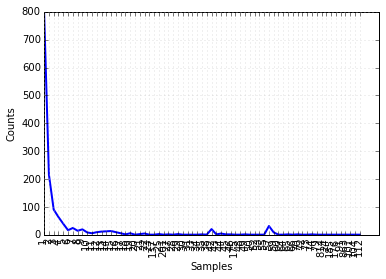

In [25]:
# Get a list of the degree frequencies
dist = FreqDist(nx.degree(H).values())
dist.plot()

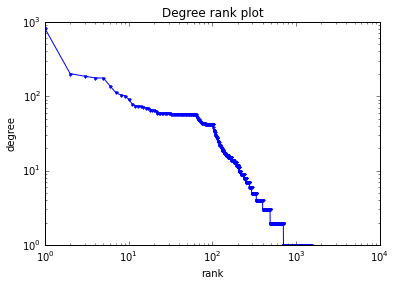

In [29]:
# Compute Power log sequence
degree_sequence=sorted(nx.degree(H).values(),reverse=True) # degree sequence

plt.loglog(degree_sequence,'b-',marker='.')
plt.title("Degree rank plot")
plt.ylabel("degree")
plt.xlabel("rank")

In [30]:
def nbest_centrality(graph, metric, n=10, attribute="centrality", **kwargs):
    centrality = metric(graph, **kwargs)
    nx.set_node_attributes(graph, attribute, centrality)
    degrees = sorted(centrality.items(), key=itemgetter(1), reverse=True)
    
    for idx, item in enumerate(degrees[0:n]):
        item = (idx+1,) + item
        print "%i. %s: %0.4f" % item
    
    return degrees

In [36]:
nbest_centrality(H, nx.eigenvector_centrality_numpy, n=20)

1. gmail.com: 0.2256
2. bengfort.com: 0.2001
3. yahoo.com: 0.1679
4. aol.com: 0.1631
5. hotmail.com: 0.1624
6. mac.com: 0.1426
7. sbcglobal.net: 0.1409
8. comcast.net: 0.1364
9. cengen.com: 0.1256
10. verizon.net: 0.1222
11. live.com: 0.1195
12. msn.com: 0.1170
13. earthlink.net: 0.1166
14. cox.net: 0.1159
15. harkinsbuilders.com: 0.1155
16. att.net: 0.1144
17. bcps.k12.md.us: 0.1136
18. juno.com: 0.1129
19. pa.net: 0.1129
20. embarqmail.com: 0.1129


[('gmail.com', 0.22564367986105002),
 ('bengfort.com', 0.2001285599465081),
 ('yahoo.com', 0.16785167942370488),
 ('aol.com', 0.16309490503771343),
 ('hotmail.com', 0.16238957572026536),
 ('mac.com', 0.14261298688057256),
 ('sbcglobal.net', 0.14087868802147047),
 ('comcast.net', 0.13642115628268556),
 ('cengen.com', 0.12558232327476637),
 ('verizon.net', 0.12219121877323452),
 ('live.com', 0.11950614590221767),
 ('msn.com', 0.11704411037222785),
 ('earthlink.net', 0.11660875941601614),
 ('cox.net', 0.11587365070826143),
 ('harkinsbuilders.com', 0.11551841826667718),
 ('att.net', 0.11437379316895326),
 ('bcps.k12.md.us', 0.1135908217813414),
 ('juno.com', 0.11291119818311299),
 ('pa.net', 0.11291119818311296),
 ('embarqmail.com', 0.11291119818311296),
 ('frycomm.com', 0.11291119818311295),
 ('centurylink.net', 0.11291119818311292),
 ('oakridgecc.org', 0.1129111981831129),
 ('gcmweb.org', 0.1129111981831129),
 ('senseney.net', 0.11291119818311289),
 ('nasa.gov', 0.11283036851442328),
 ('